In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_excel(r"Iris_data.xlsx")

In [3]:
df1=df.copy()

In [4]:
df

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3
146,146,6.3,2.5,5.0,1.9
147,147,6.5,3.0,5.2,2.0
148,148,6.2,3.4,5.4,2.3


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [8]:
col_names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
data_scaled=normalize(df) #data_scaled is an array
data_scaled=pd.DataFrame(data_scaled,columns=col_names) #convert the pre list array into a dataframe
data_scaled.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801


C:\Users\Veeraraju_elluru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Veeraraju_elluru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Veeraraju_elluru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Veeraraju_elluru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMe

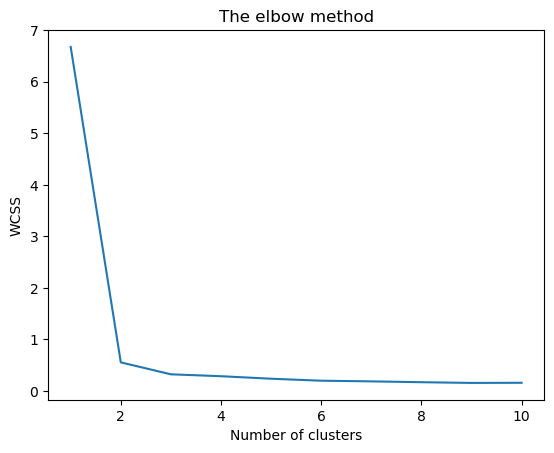

In [9]:
wcss = []

for i in range(1, 11):
    k = KMeans(n_clusters = i,init='k-means++',random_state=42)
    k.fit(data_scaled)
    wcss.append(k.inertia_)
    
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [10]:
# k=2

In [11]:
#once k is decided, we can model our dataset
km=KMeans(n_clusters=2, init='k-means++',random_state=42)
Y_pred=km.fit_predict(data_scaled)
Y_pred

C:\Users\Veeraraju_elluru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
data_scaled['cluster']=Y_pred

In [13]:
data_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.803773,0.551609,0.220644,0.031521,1
1,0.828133,0.507020,0.236609,0.033801,1
2,0.805333,0.548312,0.222752,0.034269,1
3,0.800030,0.539151,0.260879,0.034784,1
4,0.790965,0.569495,0.221470,0.031639,1
...,...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699,0
146,0.729654,0.289545,0.579090,0.220054,0
147,0.716539,0.330710,0.573231,0.220474,0
148,0.674671,0.369981,0.587616,0.250281,0


ValueError: x and y must be the same size

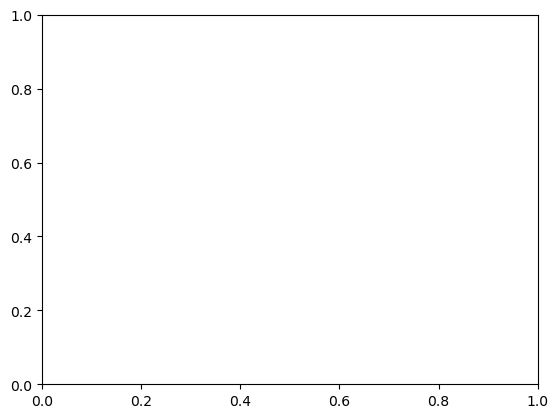

In [16]:
df1=data_scaled[data_scaled['cluster']==0]
df2=data_scaled[data_scaled['cluster']==1]

plt.scatter(df1, df2)